# Exercise 32

**Question:**

In the post-Newtonian Hamiltonian, let us put $ M = 1 $, which gives us:

$$
H(r, \phi, p_r, p_\phi) = \frac{p_r^2}{2} + \frac{p_\phi^2}{2r^2} - \frac{1}{r} - \left[ \frac{p_r^2}{r} + \frac{2}{r^2} \right].
$$

with the initial values:

$$
r = 400, \quad \phi = 0, \quad p_r = 0, \quad p_\phi = 10.
$$

Integrate the orbit numerically for $ 10^5 $ time units with and without the terms in square brackets. For each case, plot the position vector:

$$
(r \cos \phi, r \sin \phi).
$$

- The result should be an ellipse in the first case and a precessing ellipse in the second case.

Similarly, plot the velocity vector:

$$
\begin{pmatrix}
\cos \phi & -\sin \phi \\
\sin \phi & \cos \phi
\end{pmatrix}
\begin{pmatrix}
p_r \\
p_\phi / r
\end{pmatrix}.
$$

- Without the terms in square brackets, the result should be an off-center circle.

---



**Solution:**

### 1. Hamiltonian and Equations of Motion

The Hamiltonian is:

$$
H(r, \phi, p_r, p_\phi) = \frac{p_r^2}{2} + \frac{p_\phi^2}{2r^2} - \frac{1}{r} - \left[ \frac{p_r^2}{r} + \frac{2}{r^2} \right].
$$

The equations of motion are derived using:

$$
\dot{q_i} = \frac{\partial H}{\partial p_i}, \quad \dot{p_i} = -\frac{\partial H}{\partial q_i}.
$$
Substitute $ q_i = r, \phi $ and $ p_i = p_r, p_\phi $.

#### Equations with brackets:

1. $\dot{r} = \frac{\partial H}{\partial p_r} = p_r - \frac{2p_r}{r} $,
2. $\dot{p_r} = -\frac{\partial H}{\partial r} = p_\phi^2 r^{-3} - r^{-2} - p_r^2 r^{-2} +4 r^{-3}$,
3. $\dot{\phi} = \frac{\partial H}{\partial p_\phi} = \frac{p_\phi}{r^2} $,
4. $\dot{p_\phi} = -\frac{\partial H}{\partial \phi}$ = 0.

#### Equations without brackets:
1. $\dot{r} = \frac{\partial H}{\partial p_r} = p_r $,
2. $\dot{p_r} = -\frac{\partial H}{\partial r} = p_\phi^2 r^{-3} - r^{-2} $,
3. $\dot{\phi} = \frac{\partial H}{\partial p_\phi} = \frac{p_\phi}{r^2} $,
4. $\dot{p_\phi} = -\frac{\partial H}{\partial \phi}$ = 0.

#### Initial Conditions:
- $ r = 400 $,
- $ \phi = 0 $,
- $ p_r = 0 $,
- $ p_\phi = 10 $.

### 2. Numerical Integration
Use a numerical integrator (Runge-Kutta method) to solve these equations.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

r0 = 400
phi0 = 0
pr0 = 0
pphi0 = 10

t_max = 1e5
t_eval = np.linspace(0, t_max, 10000)

# Hamiltonian derivatives 
def equations_with_brackets(t, y):
    r, phi, pr, pphi = y
    dr_dt = pr - 2* pr / r  
    dphi_dt = pphi / r**2
    dpr_dt = pphi**2 / r**3 - 1 / r**2 - pr**2 / r**2 + 4 / r**3  
    dpphi_dt = 0  # No explicit phi dependence in H
    return [dr_dt, dphi_dt, dpr_dt, dpphi_dt]

def equations_without_brackets(t, y):
    r, phi, pr, pphi = y
    dr_dt = pr  
    dphi_dt = pphi / r**2
    dpr_dt = pphi**2 / r**3 - 1 / r**2  
    dpphi_dt = 0  
    return [dr_dt, dphi_dt, dpr_dt, dpphi_dt]

# Initial state
initial_state = [r0, phi0, pr0, pphi0]

# Numerical integration
sol_with_brackets = solve_ivp(equations_with_brackets, [0, t_max], initial_state, t_eval=t_eval, method='RK45')
sol_without_brackets = solve_ivp(equations_without_brackets, [0, t_max], initial_state, t_eval=t_eval, method='RK45')

# Extract solutions
r_with, phi_with, pr_with, pphi_with = sol_with_brackets.y
r_without, phi_without, pr_without, pphi_without = sol_without_brackets.y

# Convert to Cartesian coordinates
x_with = r_with * np.cos(phi_with)
y_with = r_with * np.sin(phi_with)
x_without = r_without * np.cos(phi_without)
y_without = r_without * np.sin(phi_without)

#### Position Vector
The position vector $ (r\cos\phi, r\sin\phi) $ was plotted for both cases.

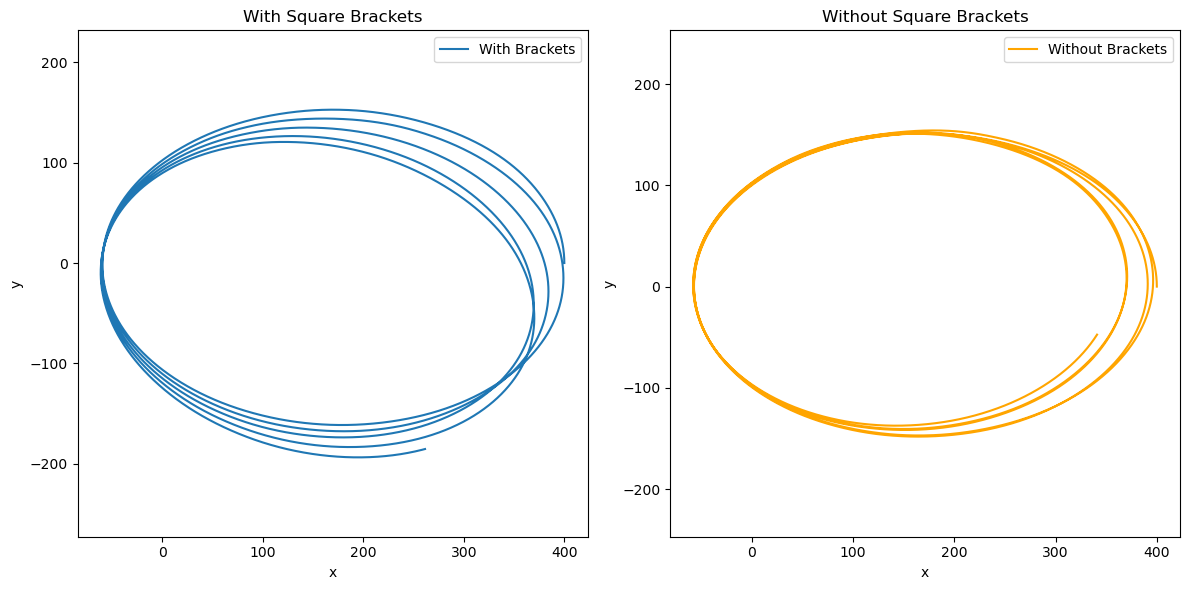

In [10]:
plt.figure(figsize=(12, 6))

# With square brackets
plt.subplot(1, 2, 1)
plt.plot(x_with, y_with, label='With Brackets')
plt.title('With Square Brackets')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.legend()

# Without square brackets
plt.subplot(1, 2, 2)
plt.plot(x_without, y_without, label='Without Brackets', color='orange')
plt.title('Without Square Brackets')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.legend()

plt.tight_layout()
plt.show()


#### Velocity Vector
The velocity vector was also computed:

$$
\begin{pmatrix}
\cos \phi & -\sin \phi \\
\sin \phi & \cos \phi
\end{pmatrix}
\begin{pmatrix}
p_r \\
p_\phi / r
\end{pmatrix}.
$$

In [11]:
# Convert to Cartesian coordinates
vx_with = pr_with * np.cos(phi_with) - np.sin(phi_with)*pphi_with/r_with
vy_with = pr_with * np.sin(phi_with) + np.cos(phi_with)*pphi_with/r_with
vx_without = pr_without * np.cos(phi_without)- np.sin(phi_without)*pphi_without/r_without
vy_without = pr_without * np.sin(phi_without)+ np.cos(phi_without)*pphi_without/r_without

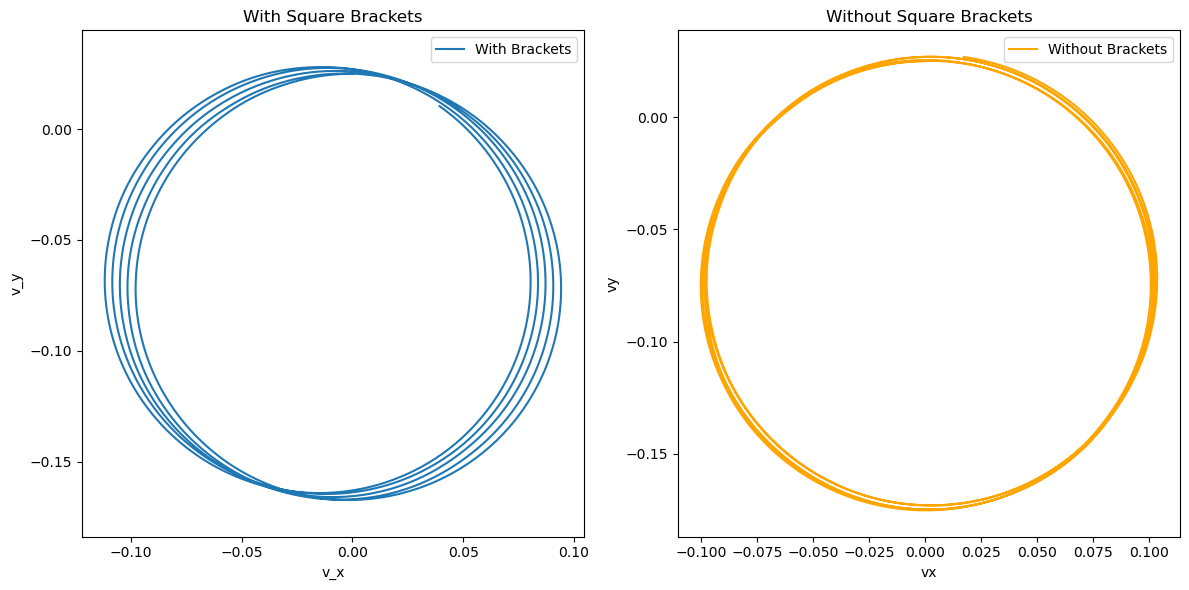

In [12]:
plt.figure(figsize=(12, 6))

# With square brackets
plt.subplot(1, 2, 1)
plt.plot(vx_with, vy_with, label='With Brackets')
plt.title('With Square Brackets')
plt.xlabel('v_x')
plt.ylabel('v_y')
plt.axis('equal')
plt.legend()

# Without square brackets
plt.subplot(1, 2, 2)
plt.plot(vx_without, vy_without, label='Without Brackets', color='orange')
plt.title('Without Square Brackets')
plt.xlabel('vx')
plt.ylabel('vy')
plt.axis('equal')
plt.legend()

plt.tight_layout()
plt.show()
